# Fall Prep Notebook 11
## CIFAR-10 I

This notebook has a few exercises that can serve as a primer for what to expect in the `Fall Problem Session 11` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Fall Problem Session 11`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Loading data from `keras`

Practice loading data from `keras.datasets` by loading the MNIST of fashion data, <a href="https://keras.io/api/datasets/fashion_mnist/">https://keras.io/api/datasets/fashion_mnist/</a>

In [4]:
from keras.datasets import fashion_mnist

In [8]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
## Run this for the next problem as well
label_dict = {0:"T-shirt/top",
                 1:"Trouser",
                 2:"Pullover",
                 3:"Dress",
                 4:"Coat",
                 5:"Sandal",
                 6:"Shirt",
                 7:"Sneaker",
                 8:"Bag",
                 9:"Ankle boot"}

#### 2. Exploring the MNIST of fashion

The data you just loaded is known as the MNIST of fashion dataset. It is an alternative to the traditional MNIST dataset that uses fashion items (see the `label_dict` above) instead of digits. Each observation is a grid of grayscale pixel values. In this problem you will explore the data a little.

##### a.

Look at the shape of `X_train` as a whole, look at the shape of the first "row" of X_train and print the first row as well.

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

##### b. 

Each grid is $28\times 28$ pixels. Plot a few of these images using `plt.imshow`, <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html">https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html</a> and then use the corresponding `y_train` label and `label_dict` to see which fashion item they are.

Trouser


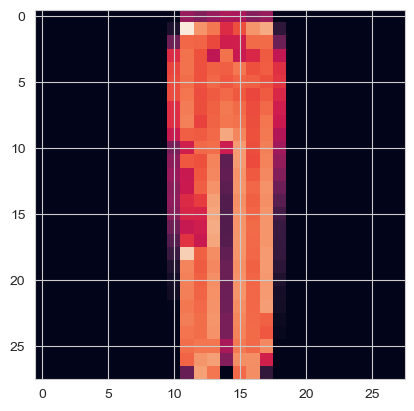

In [18]:
idx = 1000

plt.imshow(X_train[idx])
print(label_dict[y_train[idx]])

#### 2. Preparing data

In this problem we are going to pretend that you are going to train a neural network on these data

##### a.

Neural networks do not perform as well when the pixel values are fed in with their original $0$ to $255$ scale. Scale these data so that the minimum pixel value is $0$ and the maximum pixel value is $1$.

In [19]:
X_train_scale = X_train/255
X_test_scale = X_test/255


##### b.

The first kind of neural network we will learn, a feedforward or dense neural network, cannot take in a grid of values. We have to reshape the data so that it is in the form of a matrix with each row corresponding to an image and each column corresponding to a pixel value.

Reshape the data here.

In [22]:
X_train_scale = X_train_scale.reshape(-1,28*28)
X_test_scale = X_test_scale.reshape(-1,28*28)

##### c.

Neural networks can take a while to train. This makes cross-validation an impractical approach for model selection when your work time is limited, like in a 1-hour problem session. Make a validation split for these data.

In [24]:
## First make the validation set
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train_scale, y_train,
                                                          test_size=.2,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=440)

##### d.

Run these data through PCA with enough components to capture $90\%$ of the original variance. Transform the training and validation sets.

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(0.9)

In [27]:
X_tt_pca = pca.fit_transform(X_train_train)
X_val_pca = pca.transform(X_val)

In [29]:
X_tt_pca.shape

(48000, 84)

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)